In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [12]:
# data collection n processing
gold_data=pd.read_csv(r"C:\Users\HP\gld_price_data.csv")
gold_data.head()
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.shape

(2290, 6)

In [14]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [16]:
# getting statatestic measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [17]:
# find correlation bw data types
# +ve (directly proportional) or -ve correlation(indirectly proportional)
correlation=gold_data.corr()

<AxesSubplot:>

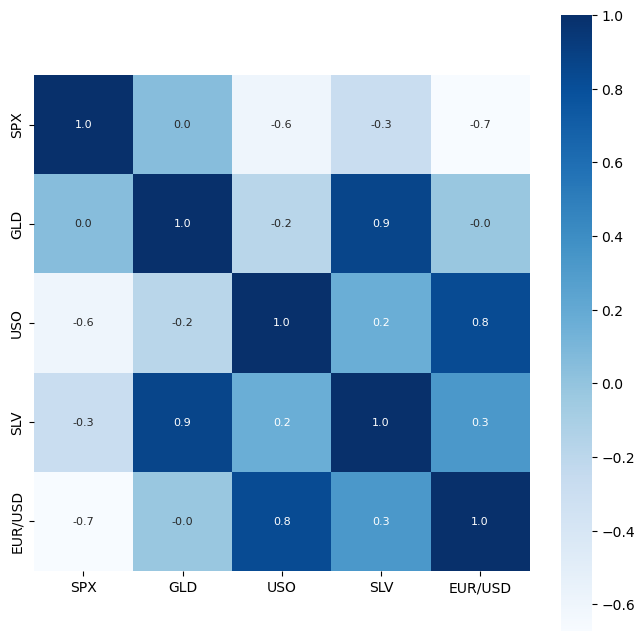

In [21]:
# constructing the head maps to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [23]:
# correlation values of gld
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


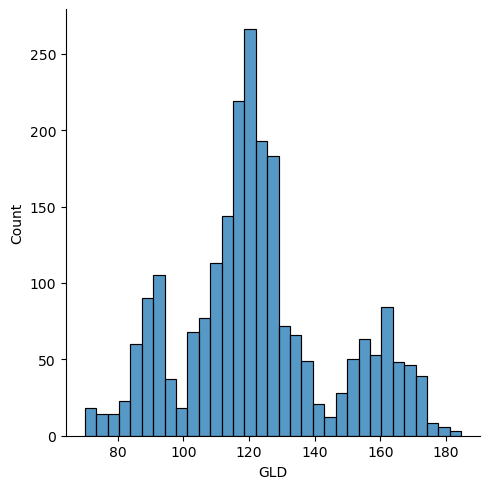

In [24]:
# check the distributation of gold price i.e GLD
sns.displot(gold_data['GLD'])


In [25]:
# preprocessing the data , splitting the features and targets
x=gold_data.drop(['Date','GLD'],axis=1)
y=gold_data['GLD']


In [29]:
# splitting into train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [30]:
# model training using randomforest regressor
regressor=RandomForestRegressor(n_estimators=100)
# training the model
regressor.fit(x_train,y_train)


RandomForestRegressor()

In [33]:
# model evaluation predict the model using test data
test_data_predict=regressor.predict(x_test)
# print(test_data_predict)

In [35]:
# evaluation using R square errors
error_score=metrics.r2_score(y_test,test_data_predict)
print(error_score)

0.9895801954719662


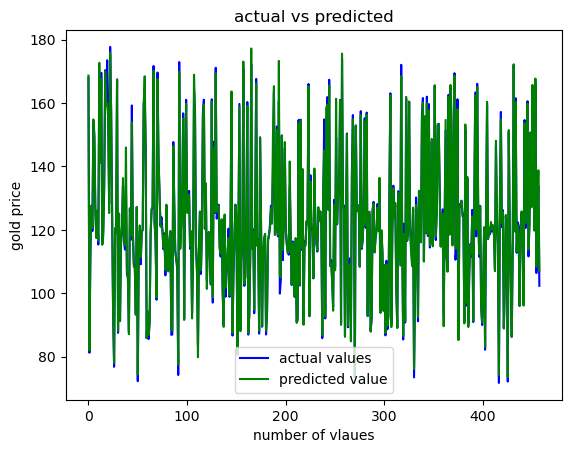

In [37]:
# compare actual value n predicted value 
y_test=list(y_test)

plt.plot(y_test,color="blue",label="actual values")

plt.plot(test_data_predict,color="green", label="predicted value")
plt.title("actual vs predicted")
plt.xlabel('number of vlaues')
plt.ylabel("gold price")
plt.legend()
plt.show()


In [ ]:
()